## Assignment 5

In this assignment, we will linearize a nonlinear dynamical model to perform trajectory tracking using Linear Quadratic Regulator (LQR). Consider the following second order nonlinear differential equation for the **inverted pendulum** model. Find the installation information for the python control package at https://python-control.readthedocs.io/en/0.9.0/intro.html.

Let $g$ and $L$ are the gravitational acceleration, the length of the pendulum arm repectively and,

$$ f: \ddot{\theta} = - \frac{g}{L} sin(\theta) -d\dot{\theta} + u,$$

where $u$ is the torque input provided by the motor attached to the pendulum arm.
By changing $u$ we can control the pendulum's state over the 2-D plane, $\mathbb{R}^2$. Here $d$ denotes a damping coefficient, which induce a resistance to the swing of the pendulum.
<img src="pendulum.png" alt="Pendulum" width="200"/>

In [1]:
from IPython.display import Image

**Part (a)**
Consider the two system states as the angle $\theta$ and the angular velocity $\dot{\theta}$. Convert $f$ into two first order nonlinear differential equations for describing the evolution of the each state. Show all the steps of the coversion. (10 Points)

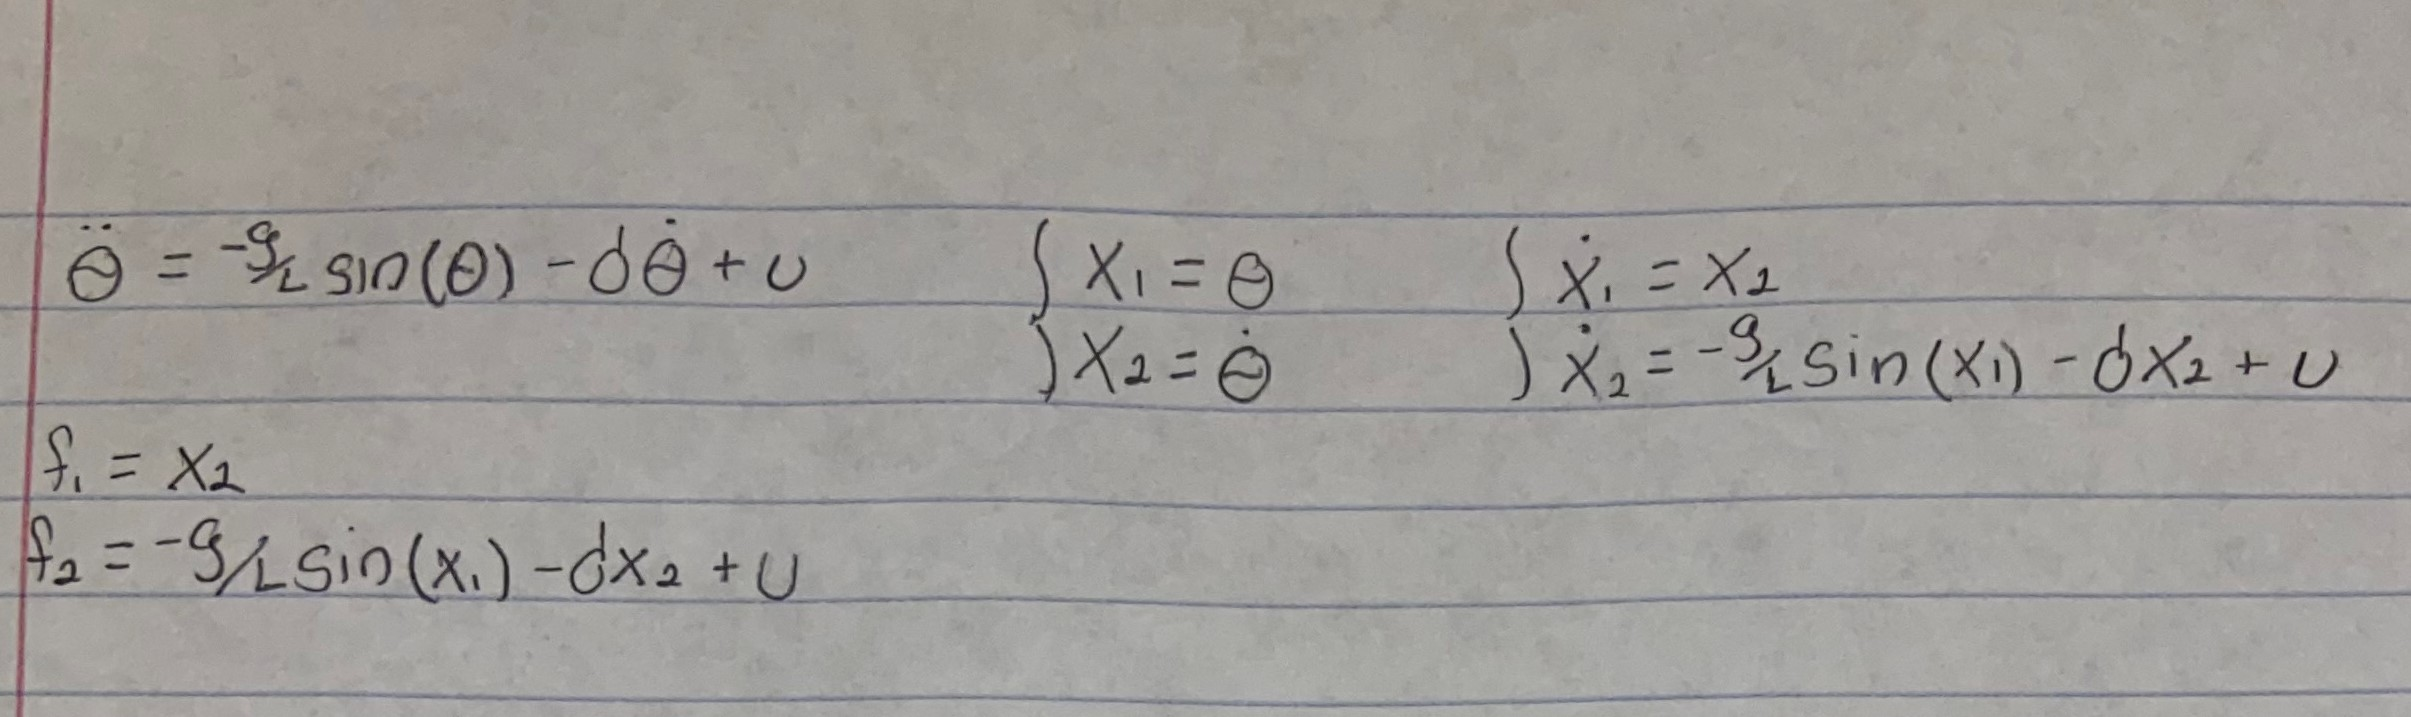

In [3]:
Image(filename = 'part_a.jpg')

**Part (b)**
Let $f_1$ and $f_2$ be the two differential equations. Linearize them using the first order Taylor series expansion to obtain the **algebraic** $A$ and $B$ matrices. Use the shorthand method discussed in the class (slide 9,10 of linear dynamical systems lecture part 2). Show all the steps of the partial differentiation. Discuss why is it important to linearize a nonlinear dynamical system. (15 points)

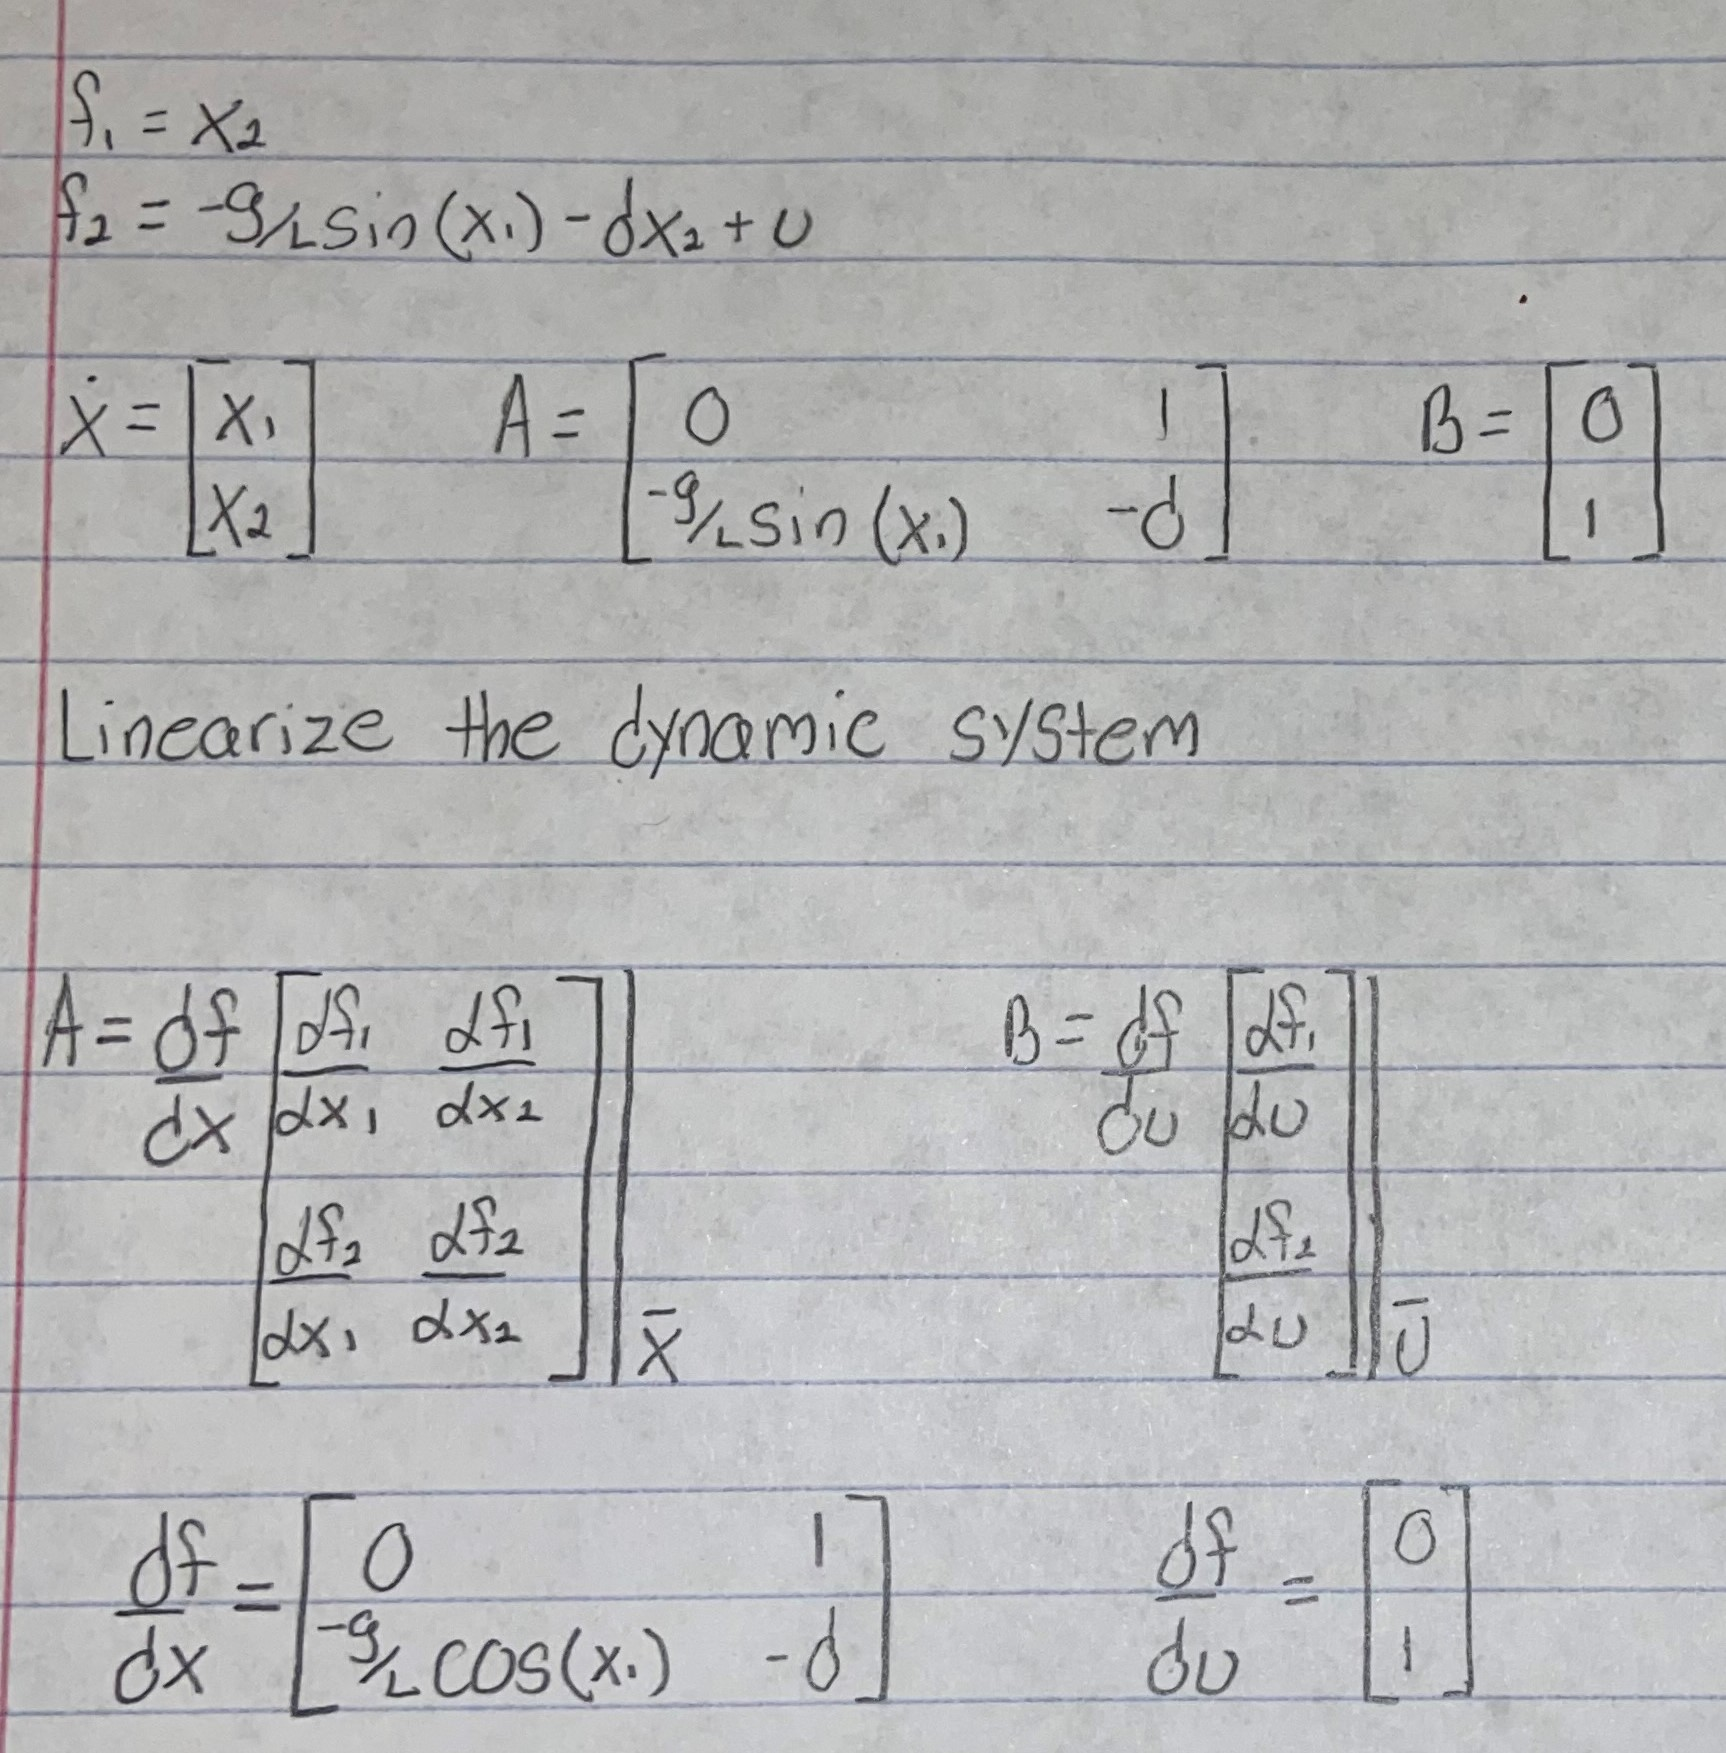

In [4]:
Image(filename = 'part_b.jpg')

It is important to linearize a nonlinear dynamical system for multiple reasons. First, linearization can be used to give important information about how a system behaves in the neighborhood of equilibrium points. In addition, a matrix of small simple equations is easier, and faster to solve than a matrix of polynomials. 

**Part (c)**
Consider the two fixed points of the pendulum $\theta = 0$ and $\theta = \pi$ radians. Substitute each fixed point to algebraic $A$, $B$ to obtain the linearized dynamical systems near the two fixed points, $A_u$ and $A_d$. 

Use $L = 2m$, $g = 10ms^{-2}$, $d = 1$. (10 points)

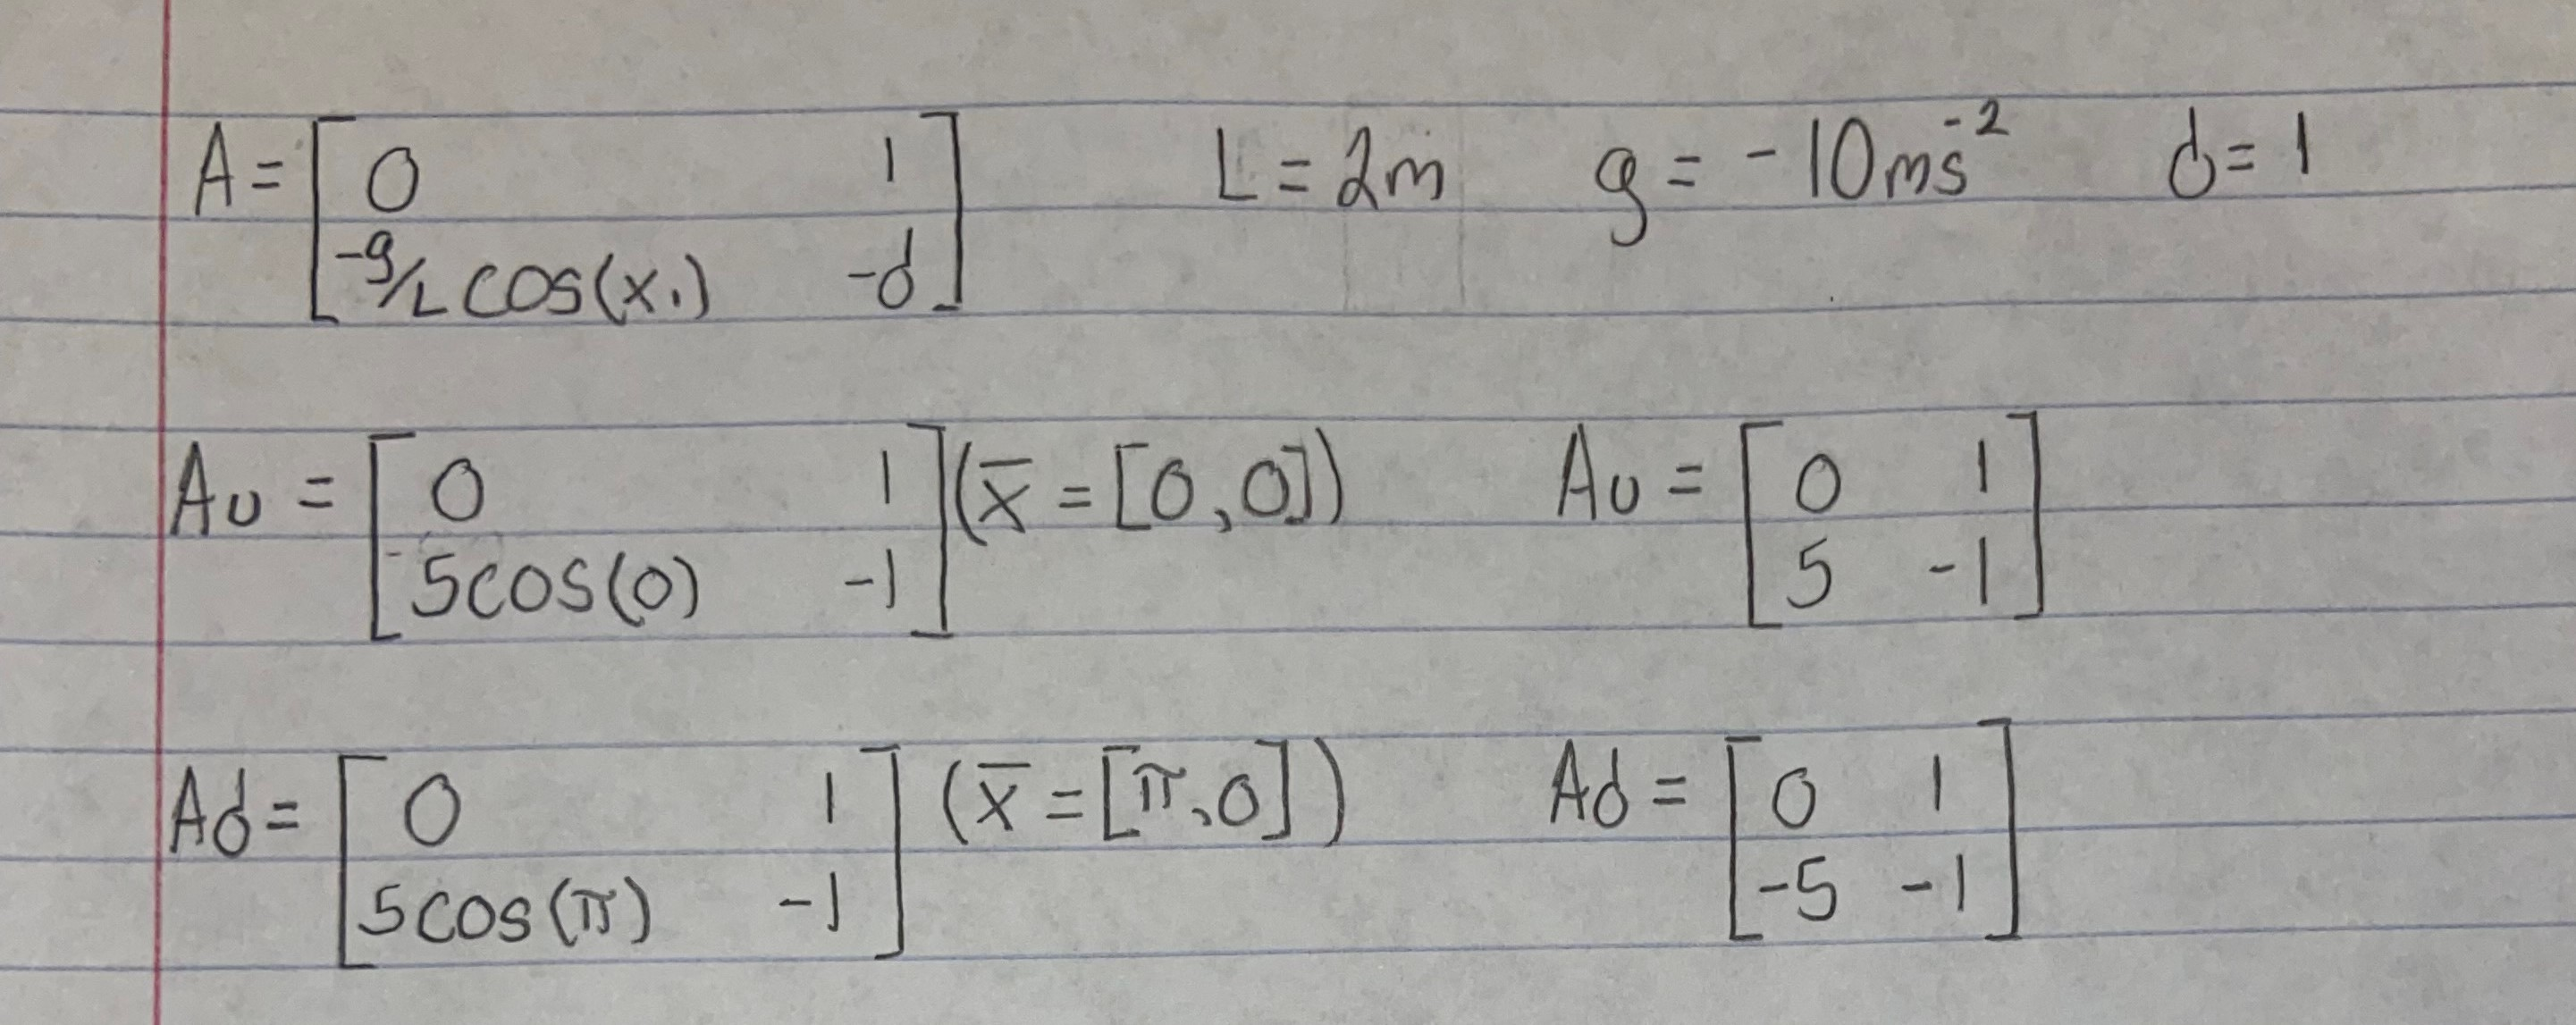

In [5]:
Image(filename = 'part_c.jpg')

**Part (d)**
At which of these fixed points does the pendulum become stable? Support your argument by using the concept of stability of linear dynamical systems. (20 points)

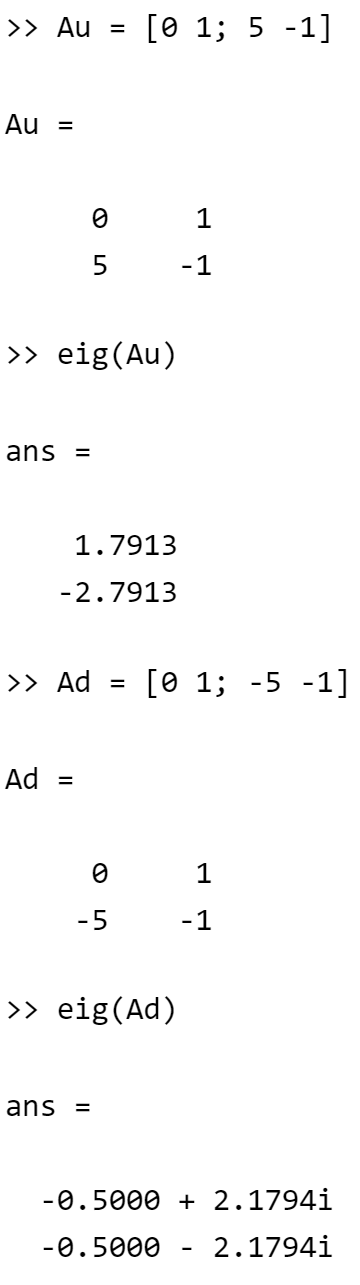

In [98]:
Image(filename = 'eig.png')

If all the Eigenvalues of A have negative real parts, the system is stable at the fixed point. If any of the Eigenvalues have positive real parts, the system is unstable at the fixed point. The system becomes stable at the fixed point θ = π because all the Eigenvalues of Ad have negative real parts. 

**Part (e)**
Simulate the system for 10 seconds at upper ($\theta = 0$) and lower ($\theta = \pi$) fixed points with an initial angular velocity $\dot{\theta} = 0.5$ rad/s for both cases. Consider $u=0$ and the pendulum is oscillating freely. Ditto for $d=0$ scenario. Refer to the plots in the slides to verify your results.
Discuss how does the pendulum's behavior change, for large and small damping coefficients. If the motor had friction, will the system equation change? (15 points)

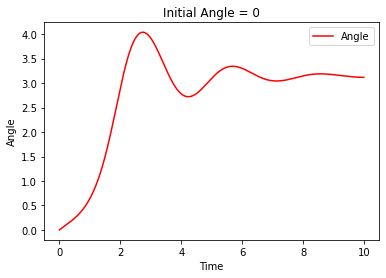

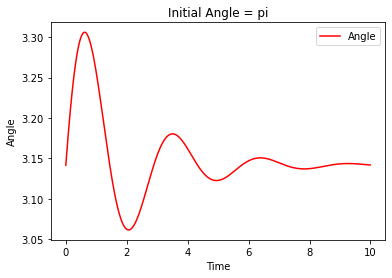

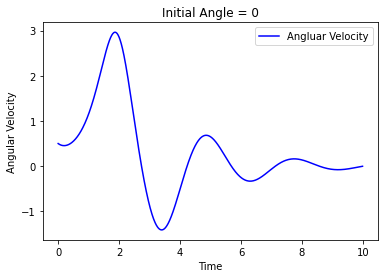

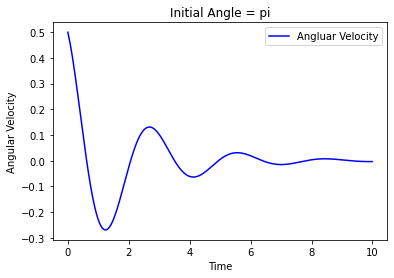

In [59]:
from scipy.integrate import odeint
import numpy as np
import math as m
import matplotlib.pyplot as p

g = -10
L = 2

def f(x, t, u, d):
    
    # u = 0 -> the pendulum is oscillating freely

    d_theta = x[1] 
    d_thetadot = -g/L*m.sin(x[0]) - d*x[1] + u
    
    f_dot = [d_theta, d_thetadot]
    return f_dot

t = np.arange(0, 10, 0.01)  #simulate the system for 10 seconds

y0 = [0, 0.5]  # upper: (angle = 0, angular velocity = 0.5 rad/s)
f_val0 = odeint(f, y0, t, args=(0, 1))

y0 = [m.pi, 0.5] # lower: (angle = pi, angular velocity = 0.5 rad/s)
f_val1 = odeint(f, y0, t, args=(0, 1))

p.figure(0)
p.title('Initial Angle = 0')
p.plot(t, f_val0[:,0] ,'r', label='Angle')
p.xlabel('Time')
p.ylabel('Angle')
p.legend(loc='best')
p.show()

p.figure(1)
p.title('Initial Angle = pi')
p.plot(t, f_val1[:,0], 'r', label='Angle')
p.xlabel('Time')
p.ylabel('Angle')
p.legend(loc='best')
p.show()

p.figure(2)
p.title('Initial Angle = 0')
p.plot(t, f_val0[:,1], 'b', label='Angluar Velocity')
p.xlabel('Time')
p.ylabel('Angular Velocity')
p.legend(loc='best')
p.show()

p.figure(3)
p.title('Initial Angle = pi')
p.plot(t, f_val1[:,1], 'b', label='Angluar Velocity')
p.xlabel('Time')
p.ylabel('Angular Velocity')
p.legend(loc='best')
p.show()

MovieWriter imagemagick unavailable; using Pillow instead.


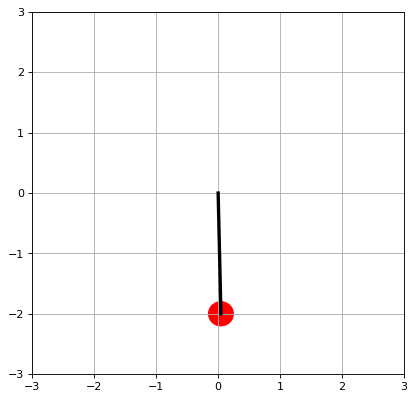

In [62]:
# visualize trajectory
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as p

fig = p.figure(figsize=(6, 6),dpi=80)
ax = p.axes(xlim=(-3, 3), ylim=(-3, 3))
line, = ax.plot([], [], lw=3, color='black')
circle = p.Circle((0, 2), 0.2, color='r')
ax.add_patch(circle)
p.grid('on')

def animate(i):
#     read the angle theta from the trajectory
    theta = f_val0[:,0][i*10]
#     set the pendulum end position
    pendx = L*np.sin(theta)
    pendy = L*np.cos(theta)
   
    line.set_xdata(np.array([0, pendx]))
    line.set_ydata(np.array([0, pendy]))
    circle.center = (pendx, pendy)
    return line,

# only use every 10th frame to animate faster
anim = FuncAnimation(fig, animate, frames= 100, interval=0.1, blit=True)
anim.save('pendulum.gif', writer='imagemagick')

When u = 0 and d = 0, that means the system has no torque and no damping coefficient. In this situation, the pendulum will swing freely forever because there is no friction. (see pendulum_no.gif) When the damping coefficient is present, the pendulum will have friction and the system will reach equilibrium. (see pendulum_d.gif) If the damping coefficient is 0, but some torque is added, the pendulum will move at a quicker pace. u = 2 in this situation. (see pendulum_u.gif)

The system will reach equilibrium faster when using large damping coefficients compared to using smaller damping coefficients. If the motor had friction, the system will reach equilibirum faster because this is equivalient to having a larger damping coefficient.

**Part (f)**
Let's implement a full state linear feedback controller (LQR) to stabilize the pendulum at the upper fixed point. Let's first identify the dimensions of the $Q$ and $R$ weight matrices. Consider the objective function for LQR, $J = (x - x^*)^TQ(x - x^*) + (u - u^*)^TR(u - u^*)$. 

Here $x, x^* \in \mathbf{R}^{2 \times 1}$ and, denote the current state vector and the state vector at the fixed points. Similarly, $u, u^* \in \mathbf{R}$ and denote the current control vector and the control vector at the fixed points. Therefore we can understand $ Q \in \mathbb{R}^{2 \times 2}$ and $ R \in \mathbb{R}$ to reallize the matrix multiplication in the cost function.

At the fixed points we like the system to be stationary, thus we use the fixed point state of the system as $x^* = [0, 0]^T$. This means that the system is stabilized at the upper fixed point with $\theta = 0$ and zero angular velocity, $\dot{\theta}=0$. Further, as the pendulum is capable of stabilizing by it's own, our desired $u^* = 0$. However, in the differentiation $u$ gets cancelled and we can ignore $u^*$.

Use **control.lqr(A, B, Q, R)** function in python to compute the gain matrix $k$ for the control rule $u = -k (x-x^*)$ at the upper fixed point. Make sure to use the corresponding $A$ matrix. Find the documentation for the lqr function at https://python-control.readthedocs.io/en/0.8.3/generated/control.lqr.html.

Plot the change of the two state variables $\theta$, $\dot{\theta}$ against time for following $Q$ and $R$ matrices. Visualize the swing of the pendulum with the animate code provided herewith.

Case 1:
$ Q = \begin{bmatrix}
100 & 0 \\
0 & 100 
\end{bmatrix}  $ $R = [1]$

Case 2:
$ Q = \begin{bmatrix}
500 & 0 \\
0 & 500 
\end{bmatrix}  $ $R = [1]$ 

Discuss why does the system behave differently in two different cases by referring to the cost function $J$. (30 points)

In [99]:
from scipy.integrate import odeint
import numpy as np
import pylab as p 
import math as m
import control

# Case 1:
# weight matrices
Q = np.eye(2)*100
R = np.matrix([[1]])

# A matrix for upper fixed point
Au = [[0, 1],
      [-5, -1]]

# B matrix 
B = [[0],
     [1]]

# get the gain matrix for stabilizing the system (ignore s and e return values)
k, s, e = control.lqr(Au, B, Q, R)
k = np.matrix(k)  # [1X2] matrix

In [100]:
# integration function
# x_star: desired fixed point
# k: is the gain matrix (1x2) computed by LQR
# d: damping coefficient

g = -10
L = 2

def f(x, t, x_star, k, d):
    
#     calculate the error/deviation from the fixed point x_bar = x-x*
    x_bar = (x-x_star)
    x_bar = np.matrix(x_bar)
    
#     use the control law u = -kx_bar
#     checkout for matrix dimensions
    u = -(k*np.transpose(x_bar))

#     write your differential equations to update theta and thetadot
#     use newly calculated u in the equation
    d_theta = x[1] 
    d_thetadot = -g/L*m.sin(x[0]) - d*x[1] + u
    
    f_dot = [d_theta, d_thetadot]
    return f_dot

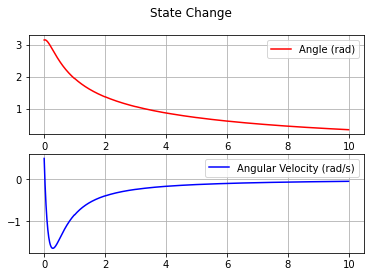

In [101]:
# integrate the system every second using odeint. use step as the integration step
# the final state of each second should be the initial condition for next second
# use traj variable to store the change in theta and thetadot by appending the results of each integration

ang = []
ang_vel = []

# Initial position pendulum at bottom
y0 = [m.pi, 0.5]
t = np.arange(0, 1, 0.01)
for i in range(10):
    f_val = odeint(f, y0, t, args=([0, 0], k, 0))
    #print(y0)
    for i in range(100):
        ang.append(f_val[:,0][i])
        ang_vel.append(f_val[:,1][i])
    y0 = f_val[-1,:]
    
# times for simulation and plotting
step = 0.01
duration = 10
ts = np.arange(0, duration, step)

# plot the angle
p.figure(0)
p.suptitle('State Change')
p.subplot(2, 1, 1)
p.plot(ts, ang,'-r', label='Angle (rad)')
p.grid('on')
p.legend(loc='best')

# plot the angular velocity
p.subplot(2, 1, 2)
p.plot(ts, ang_vel, '-b', label='Angular Velocity (rad/s)')
p.grid('on')
p.legend(loc='best')
p.show()

**Animation code**

MovieWriter imagemagick unavailable; using Pillow instead.


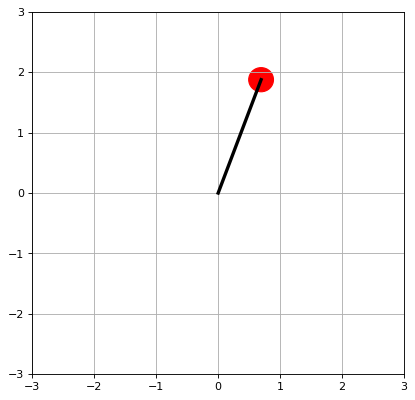

In [102]:
# visualize trajectory
from matplotlib.animation import FuncAnimation

fig = p.figure(figsize=(6, 6),dpi=80)
ax = p.axes(xlim=(-3, 3), ylim=(-3, 3))
line, = ax.plot([], [], lw=3, color='black')
circle = p.Circle((0, 2), 0.2, color='r')
ax.add_patch(circle)
p.grid('on')

def animate(i):
#     read the angle theta from the trajectory
    theta = ang[i*10]
#     set the pendulum end position
    pendx = L*np.sin(theta)
    pendy = L*np.cos(theta)
   
    line.set_xdata(np.array([0, pendx]))
    line.set_ydata(np.array([0, pendy]))
    circle.center = (pendx, pendy)
    return line,

# only use every 10th frame to animate faster
anim = FuncAnimation(fig, animate, frames= 100, interval=0.1, blit=True)
anim.save('pendulum100.gif', writer='imagemagick')

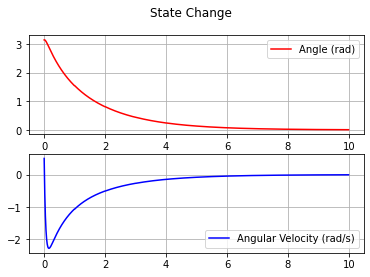

In [103]:
# Case 2
Q = np.eye(2)*500
R = np.matrix([[1]])
k, s, e = control.lqr(Au, B, Q, R)

ang = []
ang_vel = []

# Initial position pendulum at bottom
y0 = [m.pi, 0.5]
t = np.arange(0, 1, 0.01)
count = 0
for i in range(10):
    f_val = odeint(f, y0, t, args=([0, 0], k, 0))
    #print(y0)
    for i in range(100):
        ang.append(f_val[:,0][i])
        ang_vel.append(f_val[:,1][i])
    y0 = f_val[-1,:]
    
# times for simulation and plotting
step = 0.01
duration = 10
ts = np.arange(0, duration, step)

# plot the angle
p.figure(0)
p.suptitle('State Change')
p.subplot(2, 1, 1)
p.plot(ts, ang,'-r', label='Angle (rad)')
p.grid('on')
p.legend(loc='best')

# plot the angular velocity
p.subplot(2, 1, 2)
p.plot(ts, ang_vel, '-b', label='Angular Velocity (rad/s)')
p.grid('on')
p.legend(loc='best')
p.show()

MovieWriter imagemagick unavailable; using Pillow instead.


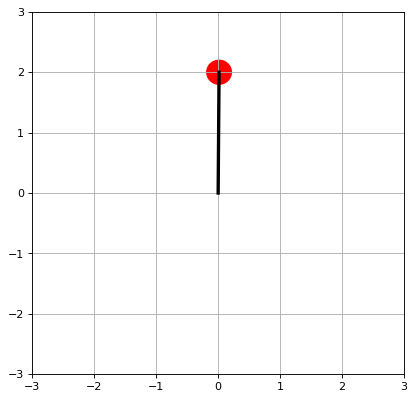

In [104]:
fig = p.figure(figsize=(6, 6),dpi=80)
ax = p.axes(xlim=(-3, 3), ylim=(-3, 3))
line, = ax.plot([], [], lw=3, color='black')
circle = p.Circle((0, 2), 0.2, color='r')
ax.add_patch(circle)
p.grid('on')

def animate(i):
#     read the angle theta from the trajectory
    theta = ang[i*10]
#     set the pendulum end position
    pendx = L*np.sin(theta)
    pendy = L*np.cos(theta)
   
    line.set_xdata(np.array([0, pendx]))
    line.set_ydata(np.array([0, pendy]))
    circle.center = (pendx, pendy)
    return line,

# only use every 10th frame to animate faster
anim = FuncAnimation(fig, animate, frames= 100, interval=0.1, blit=True)
anim.save('pendulum2000.gif', writer='imagemagick') 

The system behaves differently in the two cases because we are changing the values of Q which is being multiplied by the transpose of (x-x*) and (x-x*) in part of the cost function. When Q = [100 0; 0 100], the system takes a while to stabalize at the fixed point (0,0). When Q = [500 0; 0 500], the system stabalizes much quicker.